KeyboardInterrupt: 

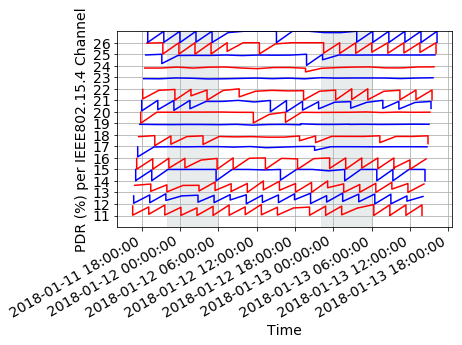

In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as md

plt.rcParams.update({'font.size': 14})
import numpy as np
pd.options.display.max_rows=10
df = pd.read_table("grenoble_7.k7",sep = ',',header = 0)
df.head(10)
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')
df=df.set_index('datetime')
plt.rcParams.update({'font.size': 14})
color_list = ["blue", "red"]

#for link, df_link in df.groupby(["src"]):
df.groupby(["src"])


for link, df_link in df.groupby(["src"]):
    dep = df_link[["channel","pdr"]].groupby("datetime", as_index=True).mean()
    #print(dep)
    for ln,ln1 in dep.groupby("channel"):
        #print(ln1)
        #plt.plot(df_freq.index, 0.8 * df_freq.mean_rssi / 100 + freq,
        plt.plot(ln1.index,  ln1.pdr + ln,
                      '-', zorder=2, markersize=2,
                      color=color_list[ln%len(color_list)])
    #print(ln1.channel)
    day1_start = pd.to_datetime("2018-01-11 22:00:00.000")
    day1_stop = pd.to_datetime("2018-01-12 06:00:00.000")
    plt.fill_between([day1_start, day1_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

    day2_start = pd.to_datetime("2018-01-12 22:00:00.000")
    day2_stop = pd.to_datetime("2018-01-13 06:00:00.000")
    plt.fill_between([day2_start, day2_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

    #day3_start = pd.to_datetime("2018-01-13 20:00:00.000")
    #day3_stop = pd.to_datetime("2018-01-13 06:00:00.000")
    #plt.fill_between([day3_start, day3_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

    plt.xlabel('Time')
    plt.ylabel('PDR (%) per IEEE802.15.4 Channel')
    #plt.ylabel('MEAN_RSSI (%) per IEEE802.15.4 Channel')
    plt.ylim([10, 27])
    plt.yticks(df.channel.unique())
    #plt.xticks(df.index.unique())
    plt.grid(True)
    #xfmt = md.DateFormatter('%H:%M:%s')
    #xfmt = md.DateFormatter('%M:%S')
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    plt.gcf().autofmt_xdate()

    plt.savefig("pdr_time_per_channel_{0}.png".format(link), format='png', bbox_inches='tight', pad_inches=0)
    #plt.savefig("rssi_time_per_channel_{0}.png".format(link), format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
